In [63]:
import SimpleITK as sitk
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import shutil

## Find Path

In [64]:
f = sorted(os.listdir('picai_public_images_fold0'))
len(f)

295

In [65]:
name_list = []
for i in f:
    temp_l = sorted(os.listdir(f'picai_public_images_fold0/{i}'))
    for j in temp_l:
        name_list.append(f'picai_public_images_fold0/{i}/{j}')
len(name_list)

1500

In [66]:
name_list

['picai_public_images_fold0/10000/10000_1000000_adc.mha',
 'picai_public_images_fold0/10000/10000_1000000_cor.mha',
 'picai_public_images_fold0/10000/10000_1000000_hbv.mha',
 'picai_public_images_fold0/10000/10000_1000000_sag.mha',
 'picai_public_images_fold0/10000/10000_1000000_t2w.mha',
 'picai_public_images_fold0/10001/10001_1000001_adc.mha',
 'picai_public_images_fold0/10001/10001_1000001_cor.mha',
 'picai_public_images_fold0/10001/10001_1000001_hbv.mha',
 'picai_public_images_fold0/10001/10001_1000001_sag.mha',
 'picai_public_images_fold0/10001/10001_1000001_t2w.mha',
 'picai_public_images_fold0/10003/10003_1000003_adc.mha',
 'picai_public_images_fold0/10003/10003_1000003_cor.mha',
 'picai_public_images_fold0/10003/10003_1000003_hbv.mha',
 'picai_public_images_fold0/10003/10003_1000003_sag.mha',
 'picai_public_images_fold0/10003/10003_1000003_t2w.mha',
 'picai_public_images_fold0/10006/10006_1000006_adc.mha',
 'picai_public_images_fold0/10006/10006_1000006_cor.mha',
 'picai_public

In [67]:
grouped_files = defaultdict(list)

for path in name_list:
    suffix = path.split('_')[-1].split('.')[0]
    grouped_files[suffix].append(path)

grouped_files = dict(grouped_files)
grouped_files

{'adc': ['picai_public_images_fold0/10000/10000_1000000_adc.mha',
  'picai_public_images_fold0/10001/10001_1000001_adc.mha',
  'picai_public_images_fold0/10003/10003_1000003_adc.mha',
  'picai_public_images_fold0/10006/10006_1000006_adc.mha',
  'picai_public_images_fold0/10017/10017_1000017_adc.mha',
  'picai_public_images_fold0/10020/10020_1000020_adc.mha',
  'picai_public_images_fold0/10022/10022_1000022_adc.mha',
  'picai_public_images_fold0/10023/10023_1000023_adc.mha',
  'picai_public_images_fold0/10027/10027_1000027_adc.mha',
  'picai_public_images_fold0/10029/10029_1000029_adc.mha',
  'picai_public_images_fold0/10032/10032_1000032_adc.mha',
  'picai_public_images_fold0/10033/10033_1000033_adc.mha',
  'picai_public_images_fold0/10035/10035_1000035_adc.mha',
  'picai_public_images_fold0/10038/10038_1000038_adc.mha',
  'picai_public_images_fold0/10040/10040_1000040_adc.mha',
  'picai_public_images_fold0/10041/10041_1000041_adc.mha',
  'picai_public_images_fold0/10045/10045_1000045_

In [68]:
grouped_files.keys()

dict_keys(['adc', 'cor', 'hbv', 'sag', 't2w'])

## Show metadata

In [69]:
def show_metadata(g_file):
    for i in g_file:
        image = sitk.ReadImage(i)
    
        keys = image.GetMetaDataKeys()
    
        for key in keys:
            print(f"{key}: {image.GetMetaData(key)}")
        print('-' * 70)

In [70]:
show_metadata(grouped_files['cor'][:5])

0008|0020: 2019-07-02
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10000
0010|0040: M
0010|1010: 073Y
0012|0062: YES
0020|000d: 1000000
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 55
PSAD_REPORT: nan
PSA_REPORT: 7.7
----------------------------------------------------------------------
0008|0020: 2016-05-27
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10001
0010|0040: M
0010|1010: 064Y
0012|0062: YES
0020|000d: 1000001
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 102
PSAD_REPORT: 0.09
PSA_REPORT: 8.7
---------------------------------------------------

In [71]:
show_metadata(grouped_files['hbv'][:5])

0008|0020: 2019-07-02
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10000
0010|0040: M
0010|1010: 073Y
0012|0062: YES
0018|9087: 1400
0020|000d: 1000000
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 55
PSAD_REPORT: nan
PSA_REPORT: 7.7
----------------------------------------------------------------------
0008|0020: 2016-05-27
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10001
0010|0040: M
0010|1010: 064Y
0012|0062: YES
0018|9087: 1400
0020|000d: 1000001
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 102
PSAD_REPORT: 0.09
PSA_REPORT: 8.7
-------------------

In [72]:
show_metadata(grouped_files['sag'][:5])

0008|0020: 2019-07-02
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10000
0010|0040: M
0010|1010: 073Y
0012|0062: YES
0020|000d: 1000000
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 55
PSAD_REPORT: nan
PSA_REPORT: 7.7
----------------------------------------------------------------------
0008|0020: 2016-05-27
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10001
0010|0040: M
0010|1010: 064Y
0012|0062: YES
0020|000d: 1000001
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 102
PSAD_REPORT: 0.09
PSA_REPORT: 8.7
---------------------------------------------------

In [73]:
show_metadata(grouped_files['t2w'][:5])

0008|0020: 2019-07-02
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10000
0010|0040: M
0010|1010: 073Y
0012|0062: YES
0020|000d: 1000000
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 55
PSAD_REPORT: nan
PSA_REPORT: 7.7
----------------------------------------------------------------------
0008|0020: 2016-05-27
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10001
0010|0040: M
0010|1010: 064Y
0012|0062: YES
0020|000d: 1000001
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 102
PSAD_REPORT: 0.09
PSA_REPORT: 8.7
---------------------------------------------------

In [74]:
show_metadata(grouped_files['adc'][:5])

0008|0020: 2019-07-02
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10000
0010|0040: M
0010|1010: 073Y
0012|0062: YES
0020|000d: 1000000
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 55
PSAD_REPORT: nan
PSA_REPORT: 7.7
----------------------------------------------------------------------
0008|0020: 2016-05-27
0008|0060: MR
0008|0070: SIEMENS
0008|1090: Skyra
0010|0020: 10001
0010|0040: M
0010|1010: 064Y
0012|0062: YES
0020|000d: 1000001
ANONYMISATION_SCRIPT: PI-CAI anonymisation script v2.0
ITK_InputFilterName: MetaImageIO
ITK_original_direction: [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing: [UNKNOWN_PRINT_CHARACTERISTICS]

Modality: MET_MOD_UNKNOWN
PROSTATE_VOLUME_REPORT: 102
PSAD_REPORT: 0.09
PSA_REPORT: 8.7
---------------------------------------------------

## Separate DataFrame by filetype

In [75]:
def df_builder(g_file, column):
    df = pd.DataFrame(columns=column)
    
    d = dict()
    
    for i in g_file:
        image = sitk.ReadImage(i)
    
        keys = image.GetMetaDataKeys()
    
        for key, keyy in zip(keys, column):
            d[keyy] = image.GetMetaData(key)
    
        new_row = pd.DataFrame(d, index = [0])
        df = pd.concat([df, new_row], ignore_index=True)
    
    return df

In [76]:
k = ['Study Date', 'Modality', 'Manufacturer', "Manufacturer's Model Name",
     'Patient ID', "Patient's Sex", "Patient's Age", "Patient Identity Removed",
     "Study Instance UID", 'ANONYMISATION_SCRIPT', 'ITK_InputFilterName', 'ITK_original_direction',
     'ITK_original_spacing', 'Modality (Repeated)', 'PROSTATE_VOLUME_REPORT', 'PSAD_REPORT', 'PSA_REPORT']

k_hbv = ['Study_Date', 'Modality', 'Manufacturer', "Manufacturer's_Model_Name",
     'Patient_ID', "Patient's_Sex", "Patient's_Age", "Patient_Identity_Removed", "Diffusion_sensitization_factor sec/mm",
     "Study Instance_UID", 'ANONYMISATION_SCRIPT', 'ITK_InputFilterName', 'ITK_original_direction',
     'ITK_original_spacing', 'Modality_(Repeated)', 'PROSTATE_VOLUME_REPORT', 'PSAD_REPORT', 'PSA_REPORT']

df_adc = df_builder(grouped_files['adc'], column=k)
df_adc['path'] = grouped_files['adc']
df_adc

Study Date Modality Manufacturer Manufacturer's Model Name Patient ID  \
0    2019-07-02       MR      SIEMENS                     Skyra      10000   
1    2016-05-27       MR      SIEMENS                     Skyra      10001   
2    2019-04-05       MR      SIEMENS                     Skyra      10003   
3    2020-10-23       MR      SIEMENS                     Skyra      10006   
4    2012-09-21       MR      SIEMENS                     Skyra      10017   
..          ...      ...          ...                       ...        ...   
295  2020-02-21       MR      SIEMENS                     Skyra      11467   
296  2020-04-18       MR      SIEMENS                     Skyra      11469   
297  2012-08-25       MR      SIEMENS                     Skyra      11471   
298  2017-09-24       MR      SIEMENS                     Skyra      11473   
299  2016-05-03       MR      SIEMENS                    Avanto      11474   

    Patient's Sex Patient's Age Patient Identity Removed Study Instance UID  \
0               M          073Y                      YES            1000000   
1               M          064Y                      YES            1000001   
2               M          072Y                      YES            1000003   
3               M          073Y                      YES            1000006   
4               M          067Y                      YES            1000017   
..            ...           ...                      ...                ...   
295             M          061Y                      YES            1001491   
296             M          049Y                      YES            1001493   
297             M          071Y                      YES            1001495   
298             M          056Y                      YES            1001497   
299             M          071Y                      YES            1001498   

                 ANONYMISATION_SCRIPT ITK_InputFilterName  \
0    PI-CAI anonymisation script v2.0         MetaImageIO   
1    PI-CAI anonymisation script v2.0         MetaImageIO   
2    PI-CAI anonymisation script v2.0         MetaImageIO   
3    PI-CAI anonymisation script v2.0         MetaImageIO   
4    PI-CAI anonymisation script v2.0         MetaImageIO   
..                                ...                 ...   
295  PI-CAI anonymisation script v2.0         MetaImageIO   
296  PI-CAI anonymisation script v2.0         MetaImageIO   
297  PI-CAI anonymisation script v2.0         MetaImageIO   
298  PI-CAI anonymisation script v2.0         MetaImageIO   
299  PI-CAI anonymisation script v2.0         MetaImageIO   

                ITK_original_direction               ITK_original_spacing  \
0    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
1    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
2    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
3    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
4    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
..                                 ...                                ...   
295  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
296  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
297  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
298  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
299  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   

    Modality (Repeated) PROSTATE_VOLUME_REPORT PSAD_REPORT PSA_REPORT  \
0       MET_MOD_UNKNOWN                     55         nan        7.7   
1       MET_MOD_UNKNOWN                    102        0.09        8.7   
2       MET_MOD_UNKNOWN                   71.5         nan         13   
3       MET_MOD_UNKNOWN                     27        0.23        6.2   
4       MET_MOD_UNKNOWN                    nan         nan        5.5   
..                  ...

In [77]:
df_cor = df_builder(grouped_files['cor'], column=k)
df_cor['path'] = grouped_files['cor']
df_cor

Study Date Modality Manufacturer Manufacturer's Model Name Patient ID  \
0    2019-07-02       MR      SIEMENS                     Skyra      10000   
1    2016-05-27       MR      SIEMENS                     Skyra      10001   
2    2019-04-05       MR      SIEMENS                     Skyra      10003   
3    2020-10-23       MR      SIEMENS                     Skyra      10006   
4    2012-09-21       MR      SIEMENS                     Skyra      10017   
..          ...      ...          ...                       ...        ...   
295  2020-02-21       MR      SIEMENS                     Skyra      11467   
296  2020-04-18       MR      SIEMENS                     Skyra      11469   
297  2012-08-25       MR      SIEMENS                     Skyra      11471   
298  2017-09-24       MR      SIEMENS                     Skyra      11473   
299  2016-05-03       MR      SIEMENS                    Avanto      11474   

    Patient's Sex Patient's Age Patient Identity Removed Study Instance UID  \
0               M          073Y                      YES            1000000   
1               M          064Y                      YES            1000001   
2               M          072Y                      YES            1000003   
3               M          073Y                      YES            1000006   
4               M          067Y                      YES            1000017   
..            ...           ...                      ...                ...   
295             M          061Y                      YES            1001491   
296             M          049Y                      YES            1001493   
297             M          071Y                      YES            1001495   
298             M          056Y                      YES            1001497   
299             M          071Y                      YES            1001498   

                 ANONYMISATION_SCRIPT ITK_InputFilterName  \
0    PI-CAI anonymisation script v2.0         MetaImageIO   
1    PI-CAI anonymisation script v2.0         MetaImageIO   
2    PI-CAI anonymisation script v2.0         MetaImageIO   
3    PI-CAI anonymisation script v2.0         MetaImageIO   
4    PI-CAI anonymisation script v2.0         MetaImageIO   
..                                ...                 ...   
295  PI-CAI anonymisation script v2.0         MetaImageIO   
296  PI-CAI anonymisation script v2.0         MetaImageIO   
297  PI-CAI anonymisation script v2.0         MetaImageIO   
298  PI-CAI anonymisation script v2.0         MetaImageIO   
299  PI-CAI anonymisation script v2.0         MetaImageIO   

                ITK_original_direction               ITK_original_spacing  \
0    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
1    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
2    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
3    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
4    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
..                                 ...                                ...   
295  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
296  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
297  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
298  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
299  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   

    Modality (Repeated) PROSTATE_VOLUME_REPORT PSAD_REPORT PSA_REPORT  \
0       MET_MOD_UNKNOWN                     55         nan        7.7   
1       MET_MOD_UNKNOWN                    102        0.09        8.7   
2       MET_MOD_UNKNOWN                   71.5         nan         13   
3       MET_MOD_UNKNOWN                     27        0.23        6.2   
4       MET_MOD_UNKNOWN                    nan         nan        5.5   
..                  ...

In [78]:
df_sag = df_builder(grouped_files['sag'], column=k)
df_sag['path'] = grouped_files['sag']
df_sag

Study Date Modality Manufacturer Manufacturer's Model Name Patient ID  \
0    2019-07-02       MR      SIEMENS                     Skyra      10000   
1    2016-05-27       MR      SIEMENS                     Skyra      10001   
2    2019-04-05       MR      SIEMENS                     Skyra      10003   
3    2020-10-23       MR      SIEMENS                     Skyra      10006   
4    2012-09-21       MR      SIEMENS                     Skyra      10017   
..          ...      ...          ...                       ...        ...   
295  2020-02-21       MR      SIEMENS                     Skyra      11467   
296  2020-04-18       MR      SIEMENS                     Skyra      11469   
297  2012-08-25       MR      SIEMENS                     Skyra      11471   
298  2017-09-24       MR      SIEMENS                     Skyra      11473   
299  2016-05-03       MR      SIEMENS                    Avanto      11474   

    Patient's Sex Patient's Age Patient Identity Removed Study Instance UID  \
0               M          073Y                      YES            1000000   
1               M          064Y                      YES            1000001   
2               M          072Y                      YES            1000003   
3               M          073Y                      YES            1000006   
4               M          067Y                      YES            1000017   
..            ...           ...                      ...                ...   
295             M          061Y                      YES            1001491   
296             M          049Y                      YES            1001493   
297             M          071Y                      YES            1001495   
298             M          056Y                      YES            1001497   
299             M          071Y                      YES            1001498   

                 ANONYMISATION_SCRIPT ITK_InputFilterName  \
0    PI-CAI anonymisation script v2.0         MetaImageIO   
1    PI-CAI anonymisation script v2.0         MetaImageIO   
2    PI-CAI anonymisation script v2.0         MetaImageIO   
3    PI-CAI anonymisation script v2.0         MetaImageIO   
4    PI-CAI anonymisation script v2.0         MetaImageIO   
..                                ...                 ...   
295  PI-CAI anonymisation script v2.0         MetaImageIO   
296  PI-CAI anonymisation script v2.0         MetaImageIO   
297  PI-CAI anonymisation script v2.0         MetaImageIO   
298  PI-CAI anonymisation script v2.0         MetaImageIO   
299  PI-CAI anonymisation script v2.0         MetaImageIO   

                ITK_original_direction               ITK_original_spacing  \
0    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
1    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
2    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
3    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
4    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
..                                 ...                                ...   
295  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
296  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
297  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
298  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
299  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   

    Modality (Repeated) PROSTATE_VOLUME_REPORT PSAD_REPORT PSA_REPORT  \
0       MET_MOD_UNKNOWN                     55         nan        7.7   
1       MET_MOD_UNKNOWN                    102        0.09        8.7   
2       MET_MOD_UNKNOWN                   71.5         nan         13   
3       MET_MOD_UNKNOWN                     27        0.23        6.2   
4       MET_MOD_UNKNOWN                    nan         nan        5.5   
..                  ...

In [79]:
df_t2w = df_builder(grouped_files['t2w'], column=k)
df_t2w['path'] = grouped_files['t2w']
df_t2w

Study Date Modality Manufacturer Manufacturer's Model Name Patient ID  \
0    2019-07-02       MR      SIEMENS                     Skyra      10000   
1    2016-05-27       MR      SIEMENS                     Skyra      10001   
2    2019-04-05       MR      SIEMENS                     Skyra      10003   
3    2020-10-23       MR      SIEMENS                     Skyra      10006   
4    2012-09-21       MR      SIEMENS                     Skyra      10017   
..          ...      ...          ...                       ...        ...   
295  2020-02-21       MR      SIEMENS                     Skyra      11467   
296  2020-04-18       MR      SIEMENS                     Skyra      11469   
297  2012-08-25       MR      SIEMENS                     Skyra      11471   
298  2017-09-24       MR      SIEMENS                     Skyra      11473   
299  2016-05-03       MR      SIEMENS                    Avanto      11474   

    Patient's Sex Patient's Age Patient Identity Removed Study Instance UID  \
0               M          073Y                      YES            1000000   
1               M          064Y                      YES            1000001   
2               M          072Y                      YES            1000003   
3               M          073Y                      YES            1000006   
4               M          067Y                      YES            1000017   
..            ...           ...                      ...                ...   
295             M          061Y                      YES            1001491   
296             M          049Y                      YES            1001493   
297             M          071Y                      YES            1001495   
298             M          056Y                      YES            1001497   
299             M          071Y                      YES            1001498   

                 ANONYMISATION_SCRIPT ITK_InputFilterName  \
0    PI-CAI anonymisation script v2.0         MetaImageIO   
1    PI-CAI anonymisation script v2.0         MetaImageIO   
2    PI-CAI anonymisation script v2.0         MetaImageIO   
3    PI-CAI anonymisation script v2.0         MetaImageIO   
4    PI-CAI anonymisation script v2.0         MetaImageIO   
..                                ...                 ...   
295  PI-CAI anonymisation script v2.0         MetaImageIO   
296  PI-CAI anonymisation script v2.0         MetaImageIO   
297  PI-CAI anonymisation script v2.0         MetaImageIO   
298  PI-CAI anonymisation script v2.0         MetaImageIO   
299  PI-CAI anonymisation script v2.0         MetaImageIO   

                ITK_original_direction               ITK_original_spacing  \
0    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
1    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
2    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
3    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
4    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
..                                 ...                                ...   
295  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
296  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
297  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
298  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
299  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   

    Modality (Repeated) PROSTATE_VOLUME_REPORT PSAD_REPORT PSA_REPORT  \
0       MET_MOD_UNKNOWN                     55         nan        7.7   
1       MET_MOD_UNKNOWN                    102        0.09        8.7   
2       MET_MOD_UNKNOWN                   71.5         nan         13   
3       MET_MOD_UNKNOWN                     27        0.23        6.2   
4       MET_MOD_UNKNOWN                    nan         nan        5.5   
..                  ...

In [80]:
df_hbv = df_builder(grouped_files['hbv'], column=k_hbv)
df_hbv['path'] = grouped_files['hbv']
df_hbv

Study_Date Modality Manufacturer Manufacturer's_Model_Name Patient_ID  \
0    2019-07-02       MR      SIEMENS                     Skyra      10000   
1    2016-05-27       MR      SIEMENS                     Skyra      10001   
2    2019-04-05       MR      SIEMENS                     Skyra      10003   
3    2020-10-23       MR      SIEMENS                     Skyra      10006   
4    2012-09-21       MR      SIEMENS                     Skyra      10017   
..          ...      ...          ...                       ...        ...   
295  2020-02-21       MR      SIEMENS                     Skyra      11467   
296  2020-04-18       MR      SIEMENS                     Skyra      11469   
297  2012-08-25       MR      SIEMENS                     Skyra      11471   
298  2017-09-24       MR      SIEMENS                     Skyra      11473   
299  2016-05-03       MR      SIEMENS                    Avanto      11474   

    Patient's_Sex Patient's_Age Patient_Identity_Removed  \
0               M          073Y                      YES   
1               M          064Y                      YES   
2               M          072Y                      YES   
3               M          073Y                      YES   
4               M          067Y                      YES   
..            ...           ...                      ...   
295             M          061Y                      YES   
296             M          049Y                      YES   
297             M          071Y                      YES   
298             M          056Y                      YES   
299             M          071Y                      YES   

    Diffusion_sensitization_factor sec/mm Study Instance_UID  \
0                                    1400            1000000   
1                                    1400            1000001   
2                                    1400            1000003   
3                                    1400            1000006   
4                                    1400            1000017   
..                                    ...                ...   
295                                  1400            1001491   
296                                  1400            1001493   
297                                  1400            1001495   
298                                  1400            1001497   
299                                  1500            1001498   

                 ANONYMISATION_SCRIPT ITK_InputFilterName  \
0    PI-CAI anonymisation script v2.0         MetaImageIO   
1    PI-CAI anonymisation script v2.0         MetaImageIO   
2    PI-CAI anonymisation script v2.0         MetaImageIO   
3    PI-CAI anonymisation script v2.0         MetaImageIO   
4    PI-CAI anonymisation script v2.0         MetaImageIO   
..                                ...                 ...   
295  PI-CAI anonymisation script v2.0         MetaImageIO   
296  PI-CAI anonymisation script v2.0         MetaImageIO   
297  PI-CAI anonymisation script v2.0         MetaImageIO   
298  PI-CAI anonymisation script v2.0         MetaImageIO   
299  PI-CAI anonymisation script v2.0         MetaImageIO   

                ITK_original_direction               ITK_original_spacing  \
0    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
1    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
2    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
3    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
4    [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
..                                 ...                                ...   
295  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
296  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
297  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n   
298  [UNKNOWN_PRINT_CHARACTERISTICS]\n  [UNKNOWN_PRINT_CHARACTERISTICS]\n  

## EDA Dateframe Metadata

In [81]:
print(df_adc.duplicated(k).sum())
print(df_cor.duplicated(k).sum())
print(df_hbv.duplicated(k_hbv).sum())
print(df_sag.duplicated(k).sum())
print(df_t2w.duplicated(k).sum())

0
0
0
0
0


In [82]:
df_adc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Study Date                 300 non-null    object
 1   Modality                   300 non-null    object
 2   Manufacturer               300 non-null    object
 3   Manufacturer's Model Name  300 non-null    object
 4   Patient ID                 300 non-null    object
 5   Patient's Sex              300 non-null    object
 6   Patient's Age              300 non-null    object
 7   Patient Identity Removed   300 non-null    object
 8   Study Instance UID         300 non-null    object
 9   ANONYMISATION_SCRIPT       300 non-null    object
 10  ITK_InputFilterName        300 non-null    object
 11  ITK_original_direction     300 non-null    object
 12  ITK_original_spacing       300 non-null    object
 13  Modality (Repeated)        300 non-null    object
 14  PROSTATE_V

In [83]:
df_adc['Study Date'] = pd.to_datetime(df_adc['Study Date'])
df_cor['Study Date'] = pd.to_datetime(df_cor['Study Date'])
df_sag['Study Date'] = pd.to_datetime(df_sag['Study Date'])
df_t2w['Study Date'] = pd.to_datetime(df_t2w['Study Date'])
df_hbv['Study_Date'] = pd.to_datetime(df_hbv['Study_Date'])

In [84]:
def patient_age(df, column):
    patient_age = [int(item[:-1]) for item in list(df[column])]
    df[column] = patient_age
    return df

In [85]:
patient_age(df_adc, 'Patient\'s Age')
patient_age(df_cor, 'Patient\'s Age')
patient_age(df_sag, 'Patient\'s Age')
patient_age(df_t2w, 'Patient\'s Age')
patient_age(df_hbv, "Patient's_Age" )
print('done')

done


In [86]:
def df_value_counts(df, columns):
    for column in columns:
        print(df[column].value_counts())
        print("-" * 70)

In [87]:
df_value_counts(df_adc, k)

Study Date
2019-01-16    2
2012-08-25    2
2019-02-23    2
2018-04-23    2
2012-08-23    2
             ..
2015-12-11    1
2018-11-22    1
2018-11-12    1
2015-06-13    1
2016-05-03    1
Name: count, Length: 288, dtype: int64
----------------------------------------------------------------------
Modality
MR    300
Name: count, dtype: int64
----------------------------------------------------------------------
Manufacturer
SIEMENS                    242
Philips Medical Systems     58
Name: count, dtype: int64
----------------------------------------------------------------------
Manufacturer's Model Name
Skyra         205
Ingenia        47
TrioTim        17
Prisma_fit     13
Achieva        11
Aera            4
Prisma          2
Avanto          1
Name: count, dtype: int64
----------------------------------------------------------------------
Patient ID
10129    2
10193    2
11383    2
11087    2
10540    2
        ..
10526    1
10525    1
10524    1
10522    1
11474    1
Name: count, Len

In [88]:
df_adc = df_adc.replace('nan', np.nan)
df_cor = df_cor.replace('nan', np.nan)
df_hbv = df_hbv.replace('nan', np.nan)
df_sag = df_sag.replace('nan', np.nan)
df_t2w = df_t2w.replace('nan', np.nan)

df_adc = df_adc.replace('MET_MOD_UNKNOWN', np.nan)
df_cor = df_cor.replace('MET_MOD_UNKNOWN', np.nan)
df_hbv = df_hbv.replace('MET_MOD_UNKNOWN', np.nan)
df_sag = df_sag.replace('MET_MOD_UNKNOWN', np.nan)
df_t2w = df_t2w.replace('MET_MOD_UNKNOWN', np.nan)

/tmp/ipykernel_9271/1849344122.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hbv = df_hbv.replace('MET_MOD_UNKNOWN', np.nan)


In [89]:
df_adc[['PSA_REPORT', 'PSAD_REPORT']] = df_adc[['PSA_REPORT', 'PSAD_REPORT']].astype('float64')
df_cor[['PSA_REPORT', 'PSAD_REPORT']] = df_cor[['PSA_REPORT', 'PSAD_REPORT']].astype('float64')
df_sag[['PSA_REPORT', 'PSAD_REPORT']] = df_sag[['PSA_REPORT', 'PSAD_REPORT']].astype('float64')
df_t2w[['PSA_REPORT', 'PSAD_REPORT']] = df_t2w[['PSA_REPORT', 'PSAD_REPORT']].astype('float64')
df_hbv[['Diffusion_sensitization_factor sec/mm', 'PSA_REPORT', 'PSAD_REPORT']] = df_hbv[['Diffusion_sensitization_factor sec/mm', 
                                                                                         'PSA_REPORT', 'PSAD_REPORT']].astype('float64')

In [90]:
df_adc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Study Date                 300 non-null    datetime64[ns]
 1   Modality                   300 non-null    object        
 2   Manufacturer               300 non-null    object        
 3   Manufacturer's Model Name  300 non-null    object        
 4   Patient ID                 300 non-null    object        
 5   Patient's Sex              300 non-null    object        
 6   Patient's Age              300 non-null    int64         
 7   Patient Identity Removed   300 non-null    object        
 8   Study Instance UID         300 non-null    object        
 9   ANONYMISATION_SCRIPT       300 non-null    object        
 10  ITK_InputFilterName        300 non-null    object        
 11  ITK_original_direction     300 non-null    object        
 12  ITK_orig

## EDA of Pictures

In [91]:
for i, pic in enumerate(grouped_files['adc'][:5]):
    image = sitk.ReadImage(pic)
    print(f"picture: {i}")
    print(f"Dimention: {image.GetDimension()}")
    print(f"Depth: {image.GetDepth()}")
    print(f"Direction: {image.GetDirection()}")
    print(f"Shape: {image.GetSize()}")
    print("-" * 70)

picture: 0
Dimention: 3
Depth: 31
Direction: (1.0, 0.0, 0.0, 0.0, 0.9198214958019287, 0.39233712016670375, 0.0, -0.39233712016670375, 0.9198214958019287)
Shape: (116, 114, 31)
----------------------------------------------------------------------
picture: 1
Dimention: 3
Depth: 21
Direction: (0.9996148108062515, -1.6670999975453016e-11, -0.02775301815627119, 0.00043710598429775216, 0.999875963366245, 0.01574378673580096, 0.027749575765060076, -0.015749853409600077, 0.9994908219500744)
Shape: (120, 128, 21)
----------------------------------------------------------------------
picture: 2
Dimention: 3
Depth: 23
Direction: (1.0, -4.896999999999999e-12, 5.819077202182931e-17, 4.755630674582797e-12, 0.9711342771144598, 0.23853346895849994, -1.1681549085430961e-12, -0.23853346895849994, 0.9711342771144598)
Shape: (120, 128, 23)
----------------------------------------------------------------------
picture: 3
Dimention: 3
Depth: 21
Direction: (1.0, -4.8970000000001024e-12, -2.8163893284788817e

In [92]:
def show_image(path):
    image = sitk.ReadImage(path)

    image_array = sitk.GetArrayFromImage(image)
    
    plt.figure(figsize=(15, 15))
    for i in range(image.GetDepth()):
        plt.subplot(4, 8, i+1)
        plt.imshow(image_array[i], cmap='gray')
        plt.title(f"Slice {i}")
    plt.tight_layout()
    plt.show()

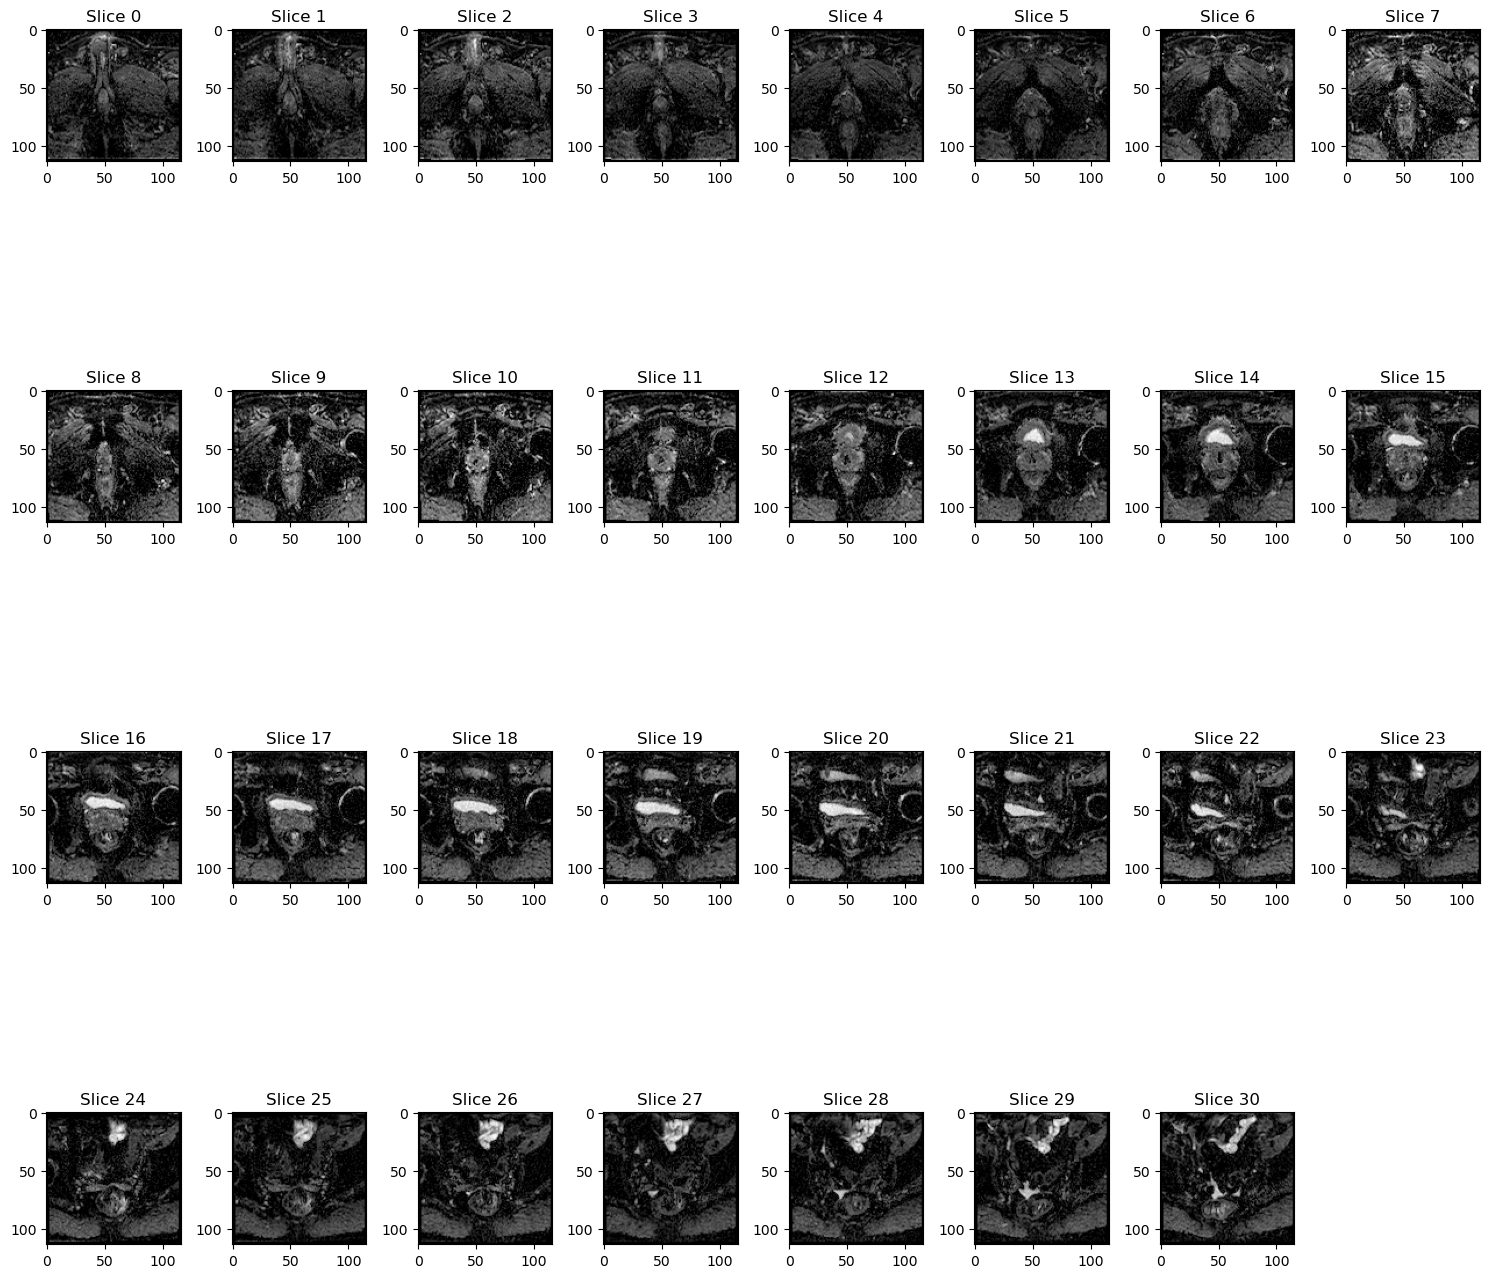

In [93]:
show_image(grouped_files['adc'][0])

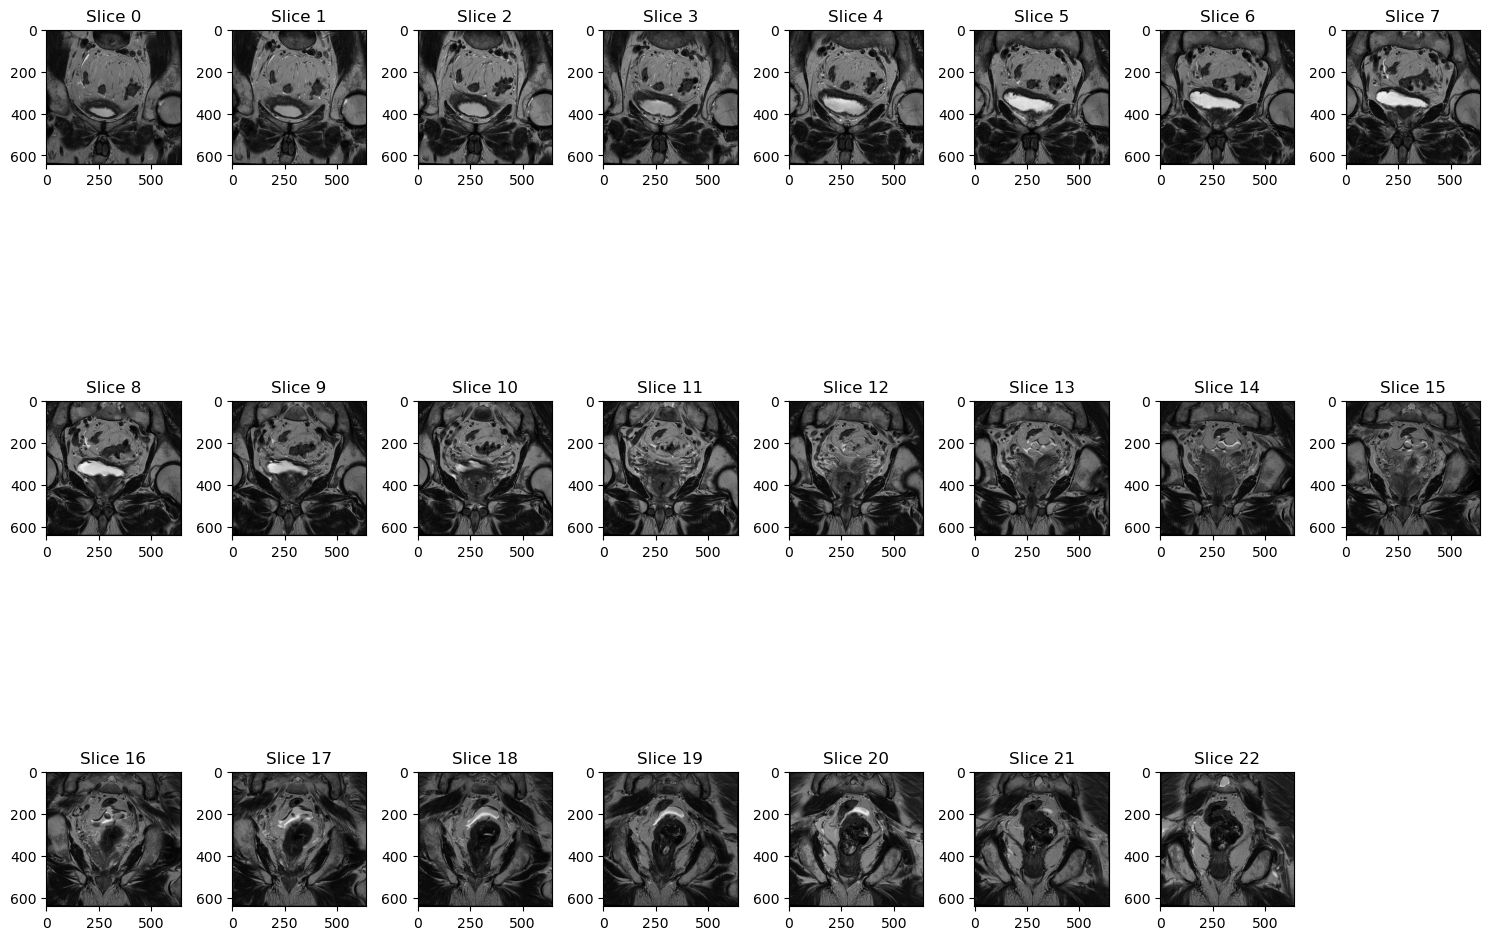

In [94]:
show_image(grouped_files['cor'][0])

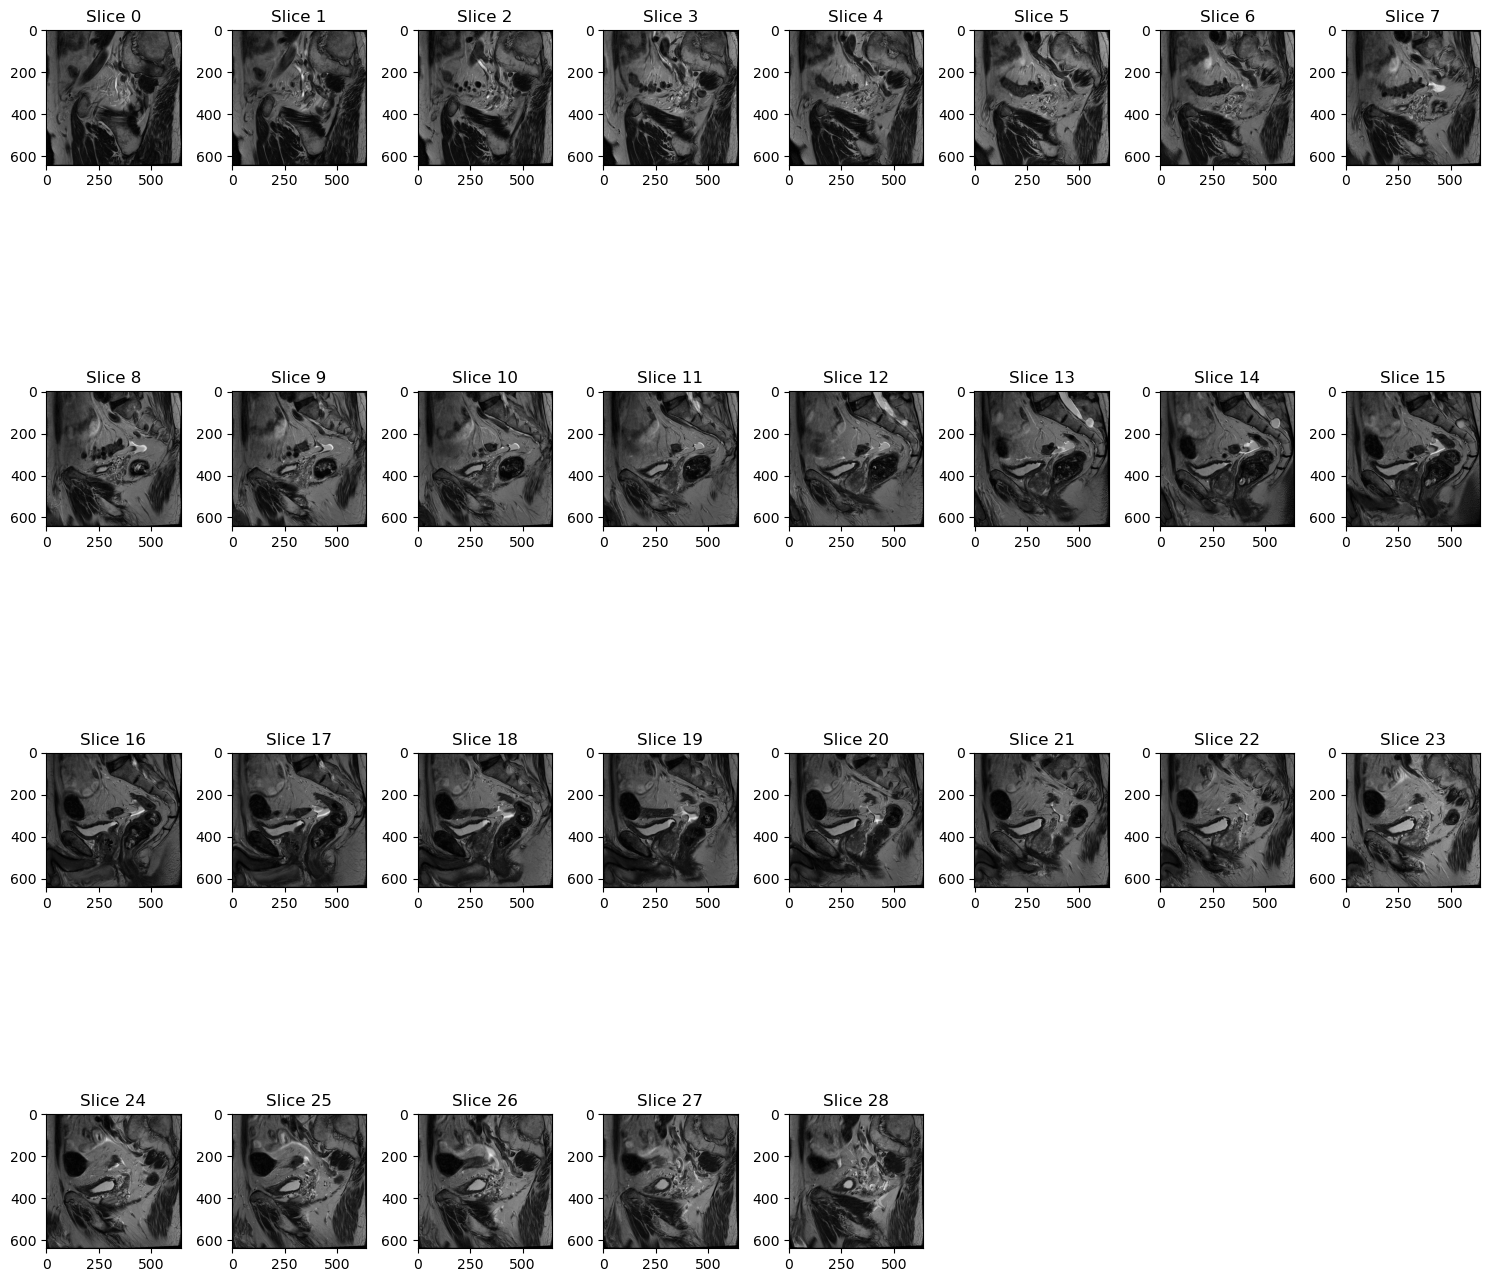

In [95]:
show_image(grouped_files['sag'][0])

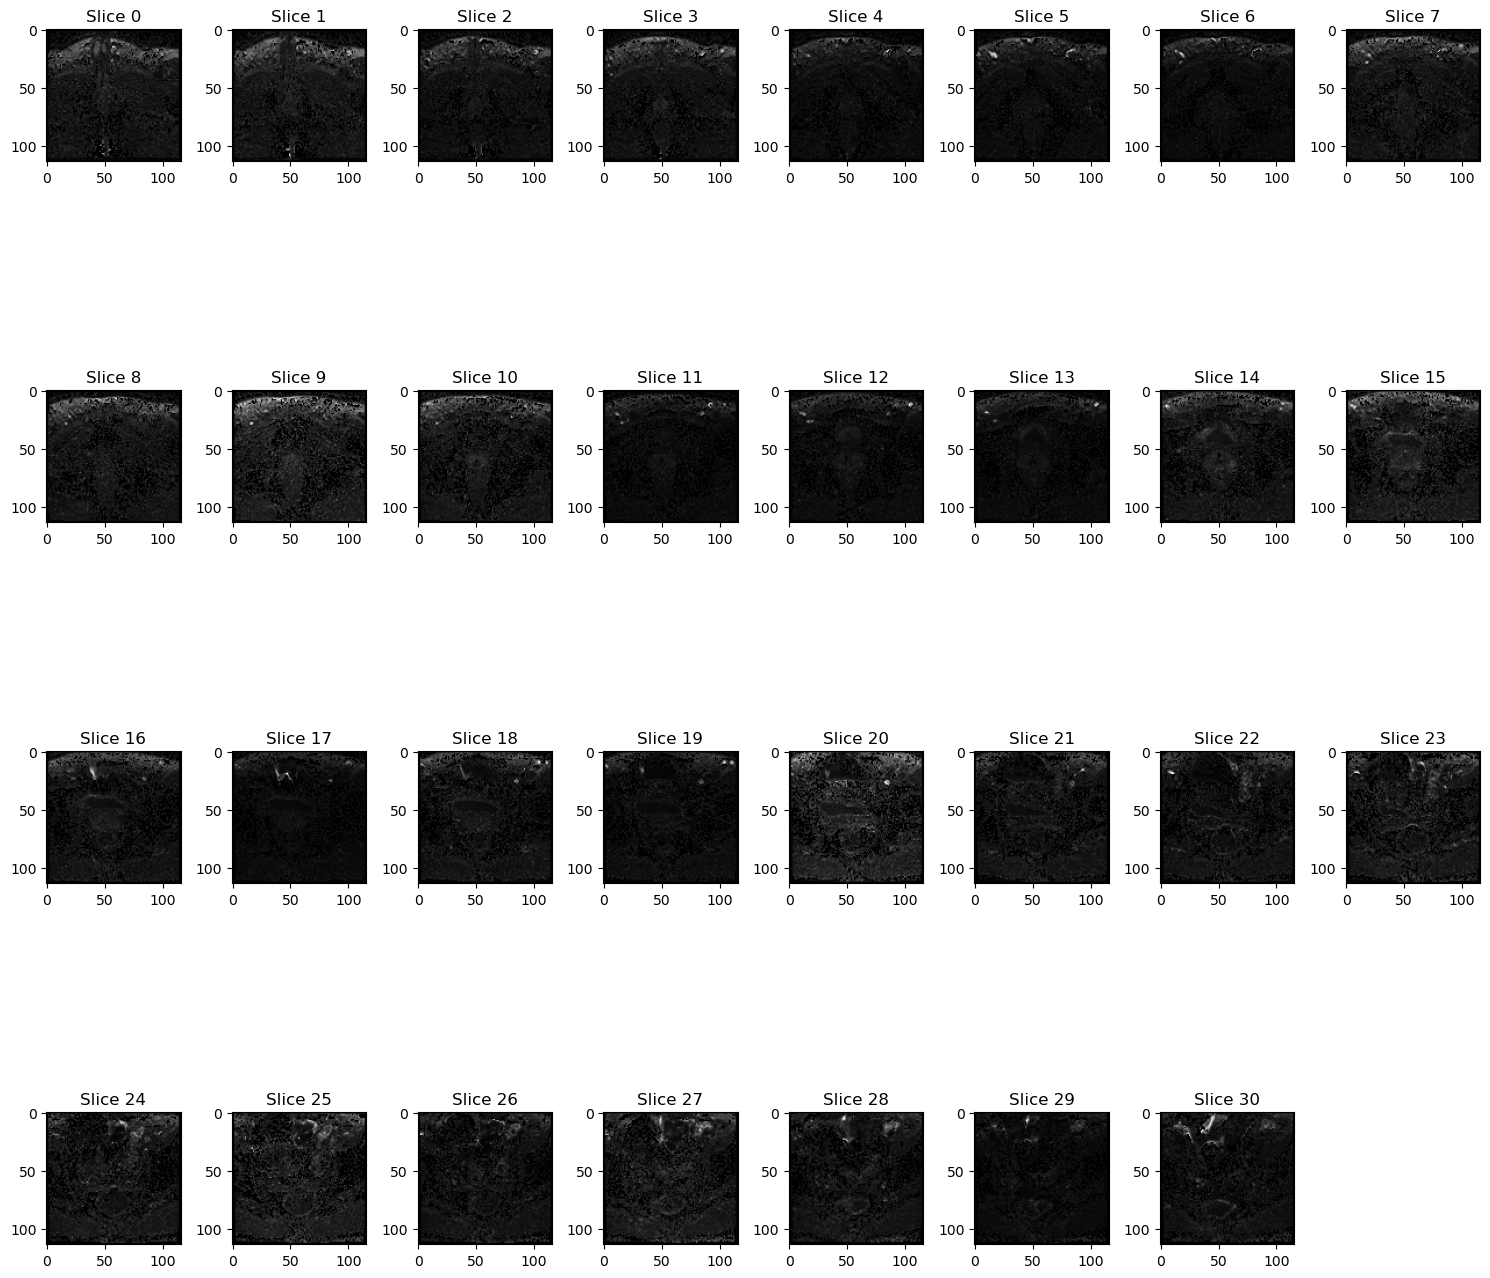

In [96]:
show_image(grouped_files['hbv'][0])

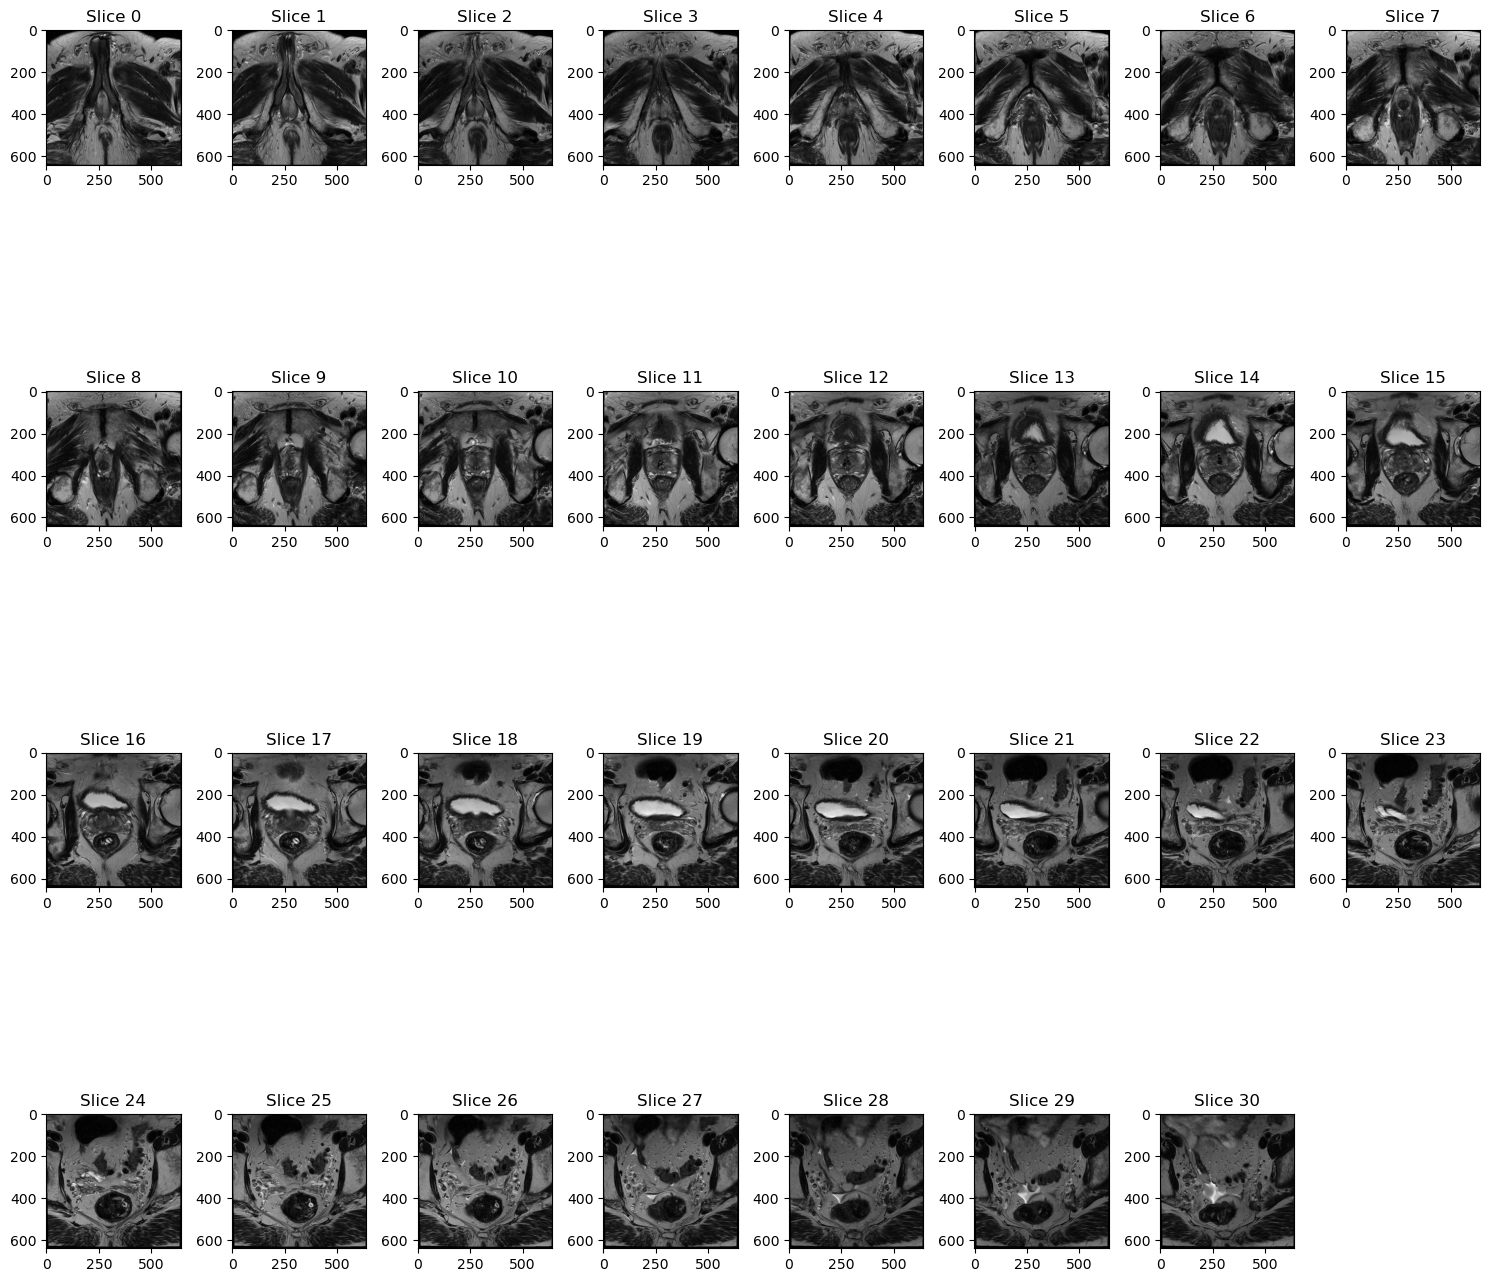

In [97]:
show_image(grouped_files['t2w'][0])

## Data Cleaning (MetaData & Pictures)

In [98]:
df_adc = df_adc.drop(['ITK_InputFilterName', 'ITK_original_direction', 'ITK_original_spacing', 'Modality (Repeated)',
              'ANONYMISATION_SCRIPT', 'Patient Identity Removed', 'Patient\'s Sex',
              'Patient ID', 'Modality'], axis = 1)

df_cor = df_cor.drop(['ITK_InputFilterName', 'ITK_original_direction', 'ITK_original_spacing', 'Modality (Repeated)',
              'ANONYMISATION_SCRIPT', 'Patient Identity Removed', 'Patient\'s Sex',
              'Patient ID', 'Modality'], axis = 1)

df_sag = df_sag.drop(['ITK_InputFilterName', 'ITK_original_direction', 'ITK_original_spacing', 'Modality (Repeated)',
              'ANONYMISATION_SCRIPT', 'Patient Identity Removed', 'Patient\'s Sex',
              'Patient ID', 'Modality'], axis = 1)

df_t2w = df_t2w.drop(['ITK_InputFilterName', 'ITK_original_direction', 'ITK_original_spacing', 'Modality (Repeated)',
              'ANONYMISATION_SCRIPT', 'Patient Identity Removed', 'Patient\'s Sex',
              'Patient ID', 'Modality'], axis = 1)

df_hbv = df_hbv.drop(['ITK_InputFilterName', 'ITK_original_direction', 'ITK_original_spacing', 'Modality_(Repeated)',
              'ANONYMISATION_SCRIPT', 'Patient_Identity_Removed', 'Patient\'s_Sex',
              'Patient_ID', 'Modality'], axis = 1)

In [99]:
df_adc.set_index('Study Instance UID', inplace=True)
df_cor.set_index('Study Instance UID', inplace=True)
df_sag.set_index('Study Instance UID', inplace=True)
df_t2w.set_index('Study Instance UID', inplace=True)
df_hbv.set_index('Study Instance_UID', inplace=True)

In [100]:
df_hbv['path'].duplicated().any()

False

In [101]:
df_hbv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1000000 to 1001498
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Study_Date                             300 non-null    datetime64[ns]
 1   Manufacturer                           300 non-null    object        
 2   Manufacturer's_Model_Name              300 non-null    object        
 3   Patient's_Age                          300 non-null    int64         
 4   Diffusion_sensitization_factor sec/mm  300 non-null    float64       
 5   PROSTATE_VOLUME_REPORT                 296 non-null    object        
 6   PSAD_REPORT                            207 non-null    float64       
 7   PSA_REPORT                             293 non-null    float64       
 8   path                                   300 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory 

In [102]:
df_adc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1000000 to 1001498
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Study Date                 300 non-null    datetime64[ns]
 1   Manufacturer               300 non-null    object        
 2   Manufacturer's Model Name  300 non-null    object        
 3   Patient's Age              300 non-null    int64         
 4   PROSTATE_VOLUME_REPORT     239 non-null    object        
 5   PSAD_REPORT                264 non-null    float64       
 6   PSA_REPORT                 236 non-null    float64       
 7   path                       300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.1+ KB


In [103]:
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1000000 to 1001498
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Study Date                 300 non-null    datetime64[ns]
 1   Manufacturer               300 non-null    object        
 2   Manufacturer's Model Name  300 non-null    object        
 3   Patient's Age              300 non-null    int64         
 4   PROSTATE_VOLUME_REPORT     239 non-null    object        
 5   PSAD_REPORT                264 non-null    float64       
 6   PSA_REPORT                 236 non-null    float64       
 7   path                       300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.1+ KB


In [104]:
df_sag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1000000 to 1001498
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Study Date                 300 non-null    datetime64[ns]
 1   Manufacturer               300 non-null    object        
 2   Manufacturer's Model Name  300 non-null    object        
 3   Patient's Age              300 non-null    int64         
 4   PROSTATE_VOLUME_REPORT     239 non-null    object        
 5   PSAD_REPORT                264 non-null    float64       
 6   PSA_REPORT                 236 non-null    float64       
 7   path                       300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.1+ KB


In [105]:
df_t2w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1000000 to 1001498
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Study Date                 300 non-null    datetime64[ns]
 1   Manufacturer               300 non-null    object        
 2   Manufacturer's Model Name  300 non-null    object        
 3   Patient's Age              300 non-null    int64         
 4   PROSTATE_VOLUME_REPORT     239 non-null    object        
 5   PSAD_REPORT                264 non-null    float64       
 6   PSA_REPORT                 236 non-null    float64       
 7   path                       300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.1+ KB


In [106]:
df_adc.isnull().sum()

Study Date                    0
Manufacturer                  0
Manufacturer's Model Name     0
Patient's Age                 0
PROSTATE_VOLUME_REPORT       61
PSAD_REPORT                  36
PSA_REPORT                   64
path                          0
dtype: int64

In [107]:
df_value_counts(df_adc, df_adc.columns)

Study Date
2019-01-16    2
2012-08-25    2
2019-02-23    2
2018-04-23    2
2012-08-23    2
             ..
2015-12-11    1
2018-11-22    1
2018-11-12    1
2015-06-13    1
2016-05-03    1
Name: count, Length: 288, dtype: int64
----------------------------------------------------------------------
Manufacturer
SIEMENS                    242
Philips Medical Systems     58
Name: count, dtype: int64
----------------------------------------------------------------------
Manufacturer's Model Name
Skyra         205
Ingenia        47
TrioTim        17
Prisma_fit     13
Achieva        11
Aera            4
Prisma          2
Avanto          1
Name: count, dtype: int64
----------------------------------------------------------------------
Patient's Age
66    20
71    20
69    18
62    17
65    16
67    16
70    15
68    14
73    14
63    14
61    12
64    12
60    12
58    11
56    10
72     8
59     8
75     8
74     7
77     7
78     6
76     5
54     5
55     4
51     3
57     3
50     3
49     

In [108]:
df_adc.isnull().sum()

Study Date                    0
Manufacturer                  0
Manufacturer's Model Name     0
Patient's Age                 0
PROSTATE_VOLUME_REPORT       61
PSAD_REPORT                  36
PSA_REPORT                   64
path                          0
dtype: int64

In [109]:
df_adc.describe()

Study Date  Patient's Age  PSAD_REPORT  PSA_REPORT
count                  300     300.000000   264.000000  236.000000
mean   2017-04-01 21:55:12      65.656667    12.487635   12.571992
min    2011-12-24 00:00:00      43.000000     0.010000    0.100000
25%    2014-06-12 00:00:00      61.000000     0.120000    5.595000
50%    2018-04-25 12:00:00      66.000000     0.200000    8.850000
75%    2019-09-17 00:00:00      71.000000     0.675000   14.000000
max    2021-08-11 00:00:00      89.000000   200.000000  134.000000
std                    NaN       7.184533    29.842877   14.354915

In [110]:
df_cor.isna().sum()

Study Date                    0
Manufacturer                  0
Manufacturer's Model Name     0
Patient's Age                 0
PROSTATE_VOLUME_REPORT       61
PSAD_REPORT                  36
PSA_REPORT                   64
path                          0
dtype: int64

In [111]:
df_t2w.isna().sum()

Study Date                    0
Manufacturer                  0
Manufacturer's Model Name     0
Patient's Age                 0
PROSTATE_VOLUME_REPORT       61
PSAD_REPORT                  36
PSA_REPORT                   64
path                          0
dtype: int64

In [112]:
df_hbv.isna().sum()

Study_Date                                0
Manufacturer                              0
Manufacturer's_Model_Name                 0
Patient's_Age                             0
Diffusion_sensitization_factor sec/mm     0
PROSTATE_VOLUME_REPORT                    4
PSAD_REPORT                              93
PSA_REPORT                                7
path                                      0
dtype: int64

In [113]:
df_sag.isna().sum()

Study Date                    0
Manufacturer                  0
Manufacturer's Model Name     0
Patient's Age                 0
PROSTATE_VOLUME_REPORT       61
PSAD_REPORT                  36
PSA_REPORT                   64
path                          0
dtype: int64

In [114]:
df_hbv = df_hbv.dropna(axis=0)
df_sag = df_sag.dropna(axis=0)
df_adc = df_adc.dropna(axis=0)
df_cor = df_cor.dropna(axis=0)
df_t2w = df_t2w.dropna(axis=0)

In [115]:
print(df_hbv.shape)
print(df_sag.shape)
print(df_adc.shape)
print(df_cor.shape)
print(df_t2w.shape)

(205, 9)
(205, 8)
(205, 8)
(205, 8)
(205, 8)


In [116]:
df_adc.shape

(205, 8)

In [117]:
print(df_adc.isnull().sum())
print("-"*70)
print(df_hbv.isnull().sum())
print("-"*70)
print(df_sag.isnull().sum())
print("-"*70)
print(df_cor.isnull().sum())
print("-"*70)
print(df_t2w.isnull().sum())
print("-"*70)

Study Date                   0
Manufacturer                 0
Manufacturer's Model Name    0
Patient's Age                0
PROSTATE_VOLUME_REPORT       0
PSAD_REPORT                  0
PSA_REPORT                   0
path                         0
dtype: int64
----------------------------------------------------------------------
Study_Date                               0
Manufacturer                             0
Manufacturer's_Model_Name                0
Patient's_Age                            0
Diffusion_sensitization_factor sec/mm    0
PROSTATE_VOLUME_REPORT                   0
PSAD_REPORT                              0
PSA_REPORT                               0
path                                     0
dtype: int64
----------------------------------------------------------------------
Study Date                   0
Manufacturer                 0
Manufacturer's Model Name    0
Patient's Age                0
PROSTATE_VOLUME_REPORT       0
PSAD_REPORT                  0
PSA_REPORT 

In [118]:
df_adc.compare(df_cor)

path  \
                                                                 self   
Study Instance UID                                                      
1000001             picai_public_images_fold0/10001/10001_1000001_...   
1000006             picai_public_images_fold0/10006/10006_1000006_...   
1000020             picai_public_images_fold0/10020/10020_1000020_...   
1000023             picai_public_images_fold0/10023/10023_1000023_...   
1000029             picai_public_images_fold0/10029/10029_1000029_...   
...                                                               ...   
1001475             picai_public_images_fold0/11451/11451_1001475_...   
1001491             picai_public_images_fold0/11467/11467_1001491_...   
1001493             picai_public_images_fold0/11469/11469_1001493_...   
1001495             picai_public_images_fold0/11471/11471_1001495_...   
1001497             picai_public_images_fold0/11473/11473_1001497_...   

                                                                       
                                                                other  
Study Instance UID                                                     
1000001             picai_public_images_fold0/10001/10001_1000001_...  
1000006             picai_public_images_fold0/10006/10006_1000006_...  
1000020             picai_public_images_fold0/10020/10020_1000020_...  
1000023             picai_public_images_fold0/10023/10023_1000023_...  
1000029             picai_public_images_fold0/10029/10029_1000029_...  
...                                                               ...  
1001475             picai_public_images_fold0/11451/11451_1001475_...  
1001491             picai_public_images_fold0/11467/11467_1001491_...  
1001493             picai_public_images_fold0/11469/11469_1001493_...  
1001495             picai_public_images_fold0/11471/11471_1001495_...  
1001497             picai_public_images_fold0/11473/11473_1001497_...  

[205 rows x 2 columns]

In [119]:
print(df_hbv.index.equals(df_adc.index))
print(df_adc.index.equals(df_t2w.index))
print(df_t2w.index.equals(df_cor.index))
print(df_cor.index.equals(df_sag.index))
print(df_sag.index.equals(df_hbv.index))

True
True
True
True
True


In [120]:
df_hbv['path'].duplicated().any()

False

In [121]:
paths = list(df_hbv['path'])

dirs = list()
for path in paths:
    directory_path = os.path.dirname(path) + '/'
    dirs.append(directory_path)

pd.Series(dirs)[pd.Series(dirs).duplicated()]

142    picai_public_images_fold0/11087/
192    picai_public_images_fold0/11383/
dtype: object

In [122]:
paths = list(df_hbv['path'])

dirs = list()
for path in paths:
    directory_path = os.path.dirname(path) + '/'
    dirs.append(directory_path)
dirs = set(dirs)

In [123]:
destination = 'Dataset_v1'
os.makedirs(destination, exist_ok=True)

for path in dirs:
    dir_name = os.path.basename(path.rstrip(os.sep))
    destination_path = os.path.join(destination, dir_name)
    shutil.copytree(path, destination_path)

FileExistsError: [Errno 17] File exists: 'Dataset_v1/11099'

In [ ]:
len(dirs)